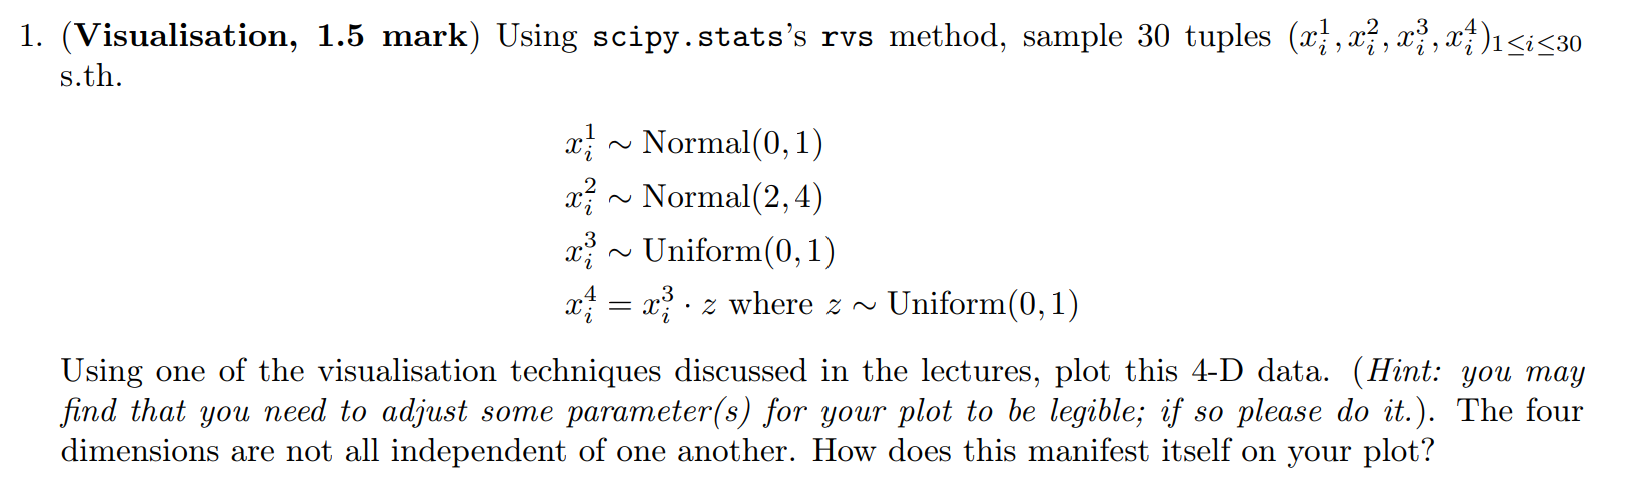

In [33]:
import scipy.stats as stats
import numpy as np
# loc = mean , scale = std
x_1 = stats.norm.rvs(loc=0, scale=1, size=30)
x_2 = stats.norm.rvs(loc=2, scale=4, size=30)
x_3 = stats.uniform.rvs(loc=0, scale=1, size=30)
z = stats.uniform.rvs(loc=0, scale=1, size=30)
x_4 = np.multiply(x_3, z)

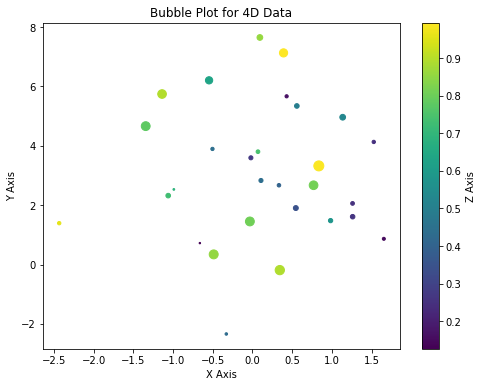

In [34]:
import matplotlib.pyplot as plt

# Sample data
x = x_1  # X-axis data
y = x_2  # Y-axis data
z = x_3  # Z-axis data
size_variable = x_4  # Size variable (4th dimension)

# Normalize the size variable if needed
normalized_size = [(size - min(size_variable)) / (max(size_variable) - min(size_variable)) * 100 for size in size_variable]

# Create the bubble plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z, s=normalized_size, cmap='viridis')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.colorbar(label='Z Axis')
plt.title('Bubble Plot for 4D Data')
plt.show()

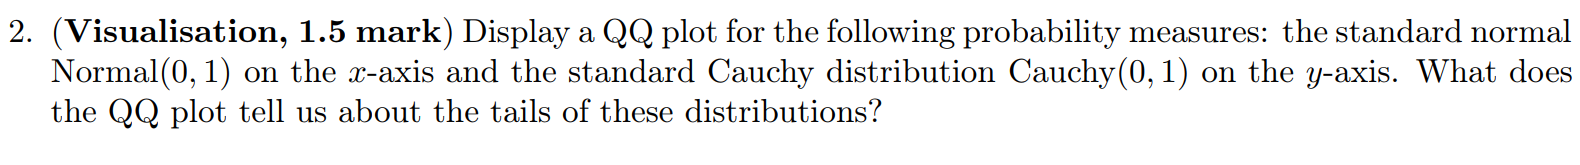

In [35]:
# !pip install statsmodels

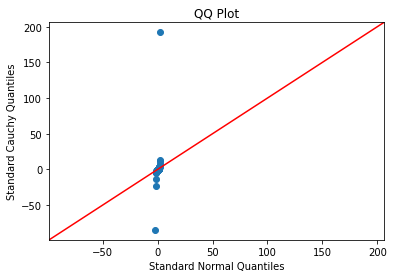

In [39]:
import statsmodels.api as sm
# Generate random samples from the standard normal distribution
x = np.random.normal(0, 1, 100)

# Generate random samples from the standard Cauchy distribution
y = np.random.standard_cauchy(100)

# Create the QQ plot
sm.qqplot_2samples(x, y, line='45')

# Customize the plot
plt.title('QQ Plot')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Standard Cauchy Quantiles')

# Display the plot
plt.show()

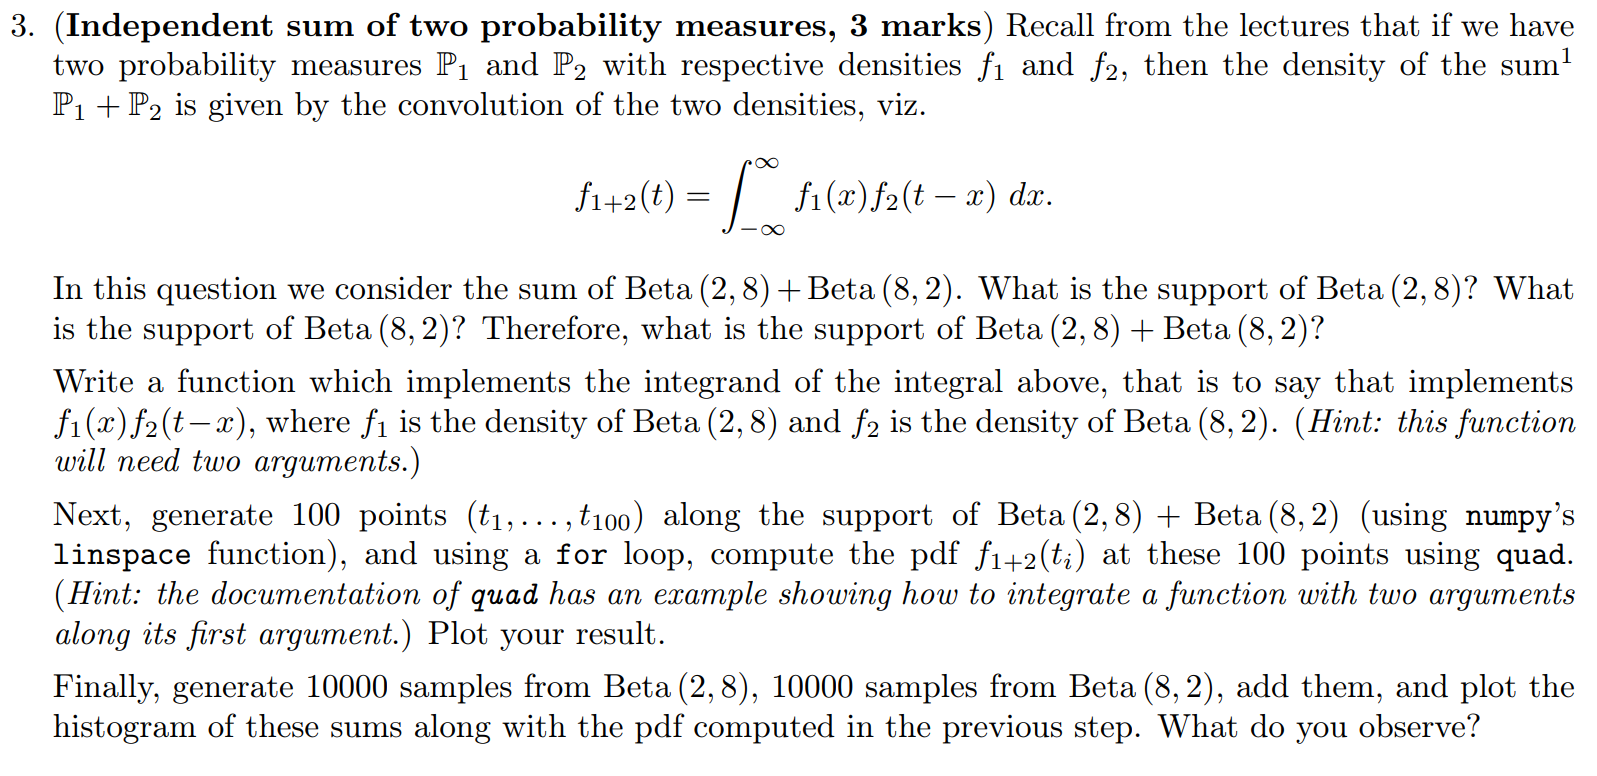

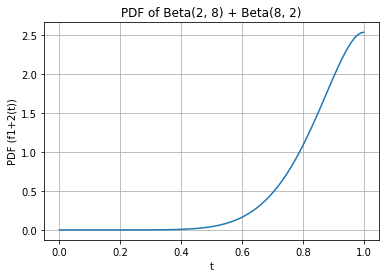

In [40]:
from scipy.integrate import quad

# Define the range for t values
t_values = np.linspace(0, 1, 100)

# Create an empty list to store the PDF values
pdf_values = []

# Define the integrand function
def integrand_beta_sum(x, t):
    f1 = stats.beta.pdf(x, a=2, b=8)
    f2 = stats.beta.pdf(t - x, a=8, b=2)
    result = f1 * f2
    return result

# Compute the PDF at each t value using quad
for t in t_values:
    pdf, _ = quad(integrand_beta_sum, 0, 1, args=(t,))
    pdf_values.append(pdf)

# Plot the results
plt.plot(t_values, pdf_values)
plt.xlabel('t')
plt.ylabel('PDF (f1+2(t))')
plt.title('PDF of Beta(2, 8) + Beta(8, 2)')
plt.grid(True)
plt.show()


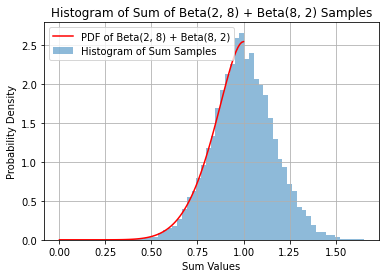

In [42]:
# Number of samples
num_samples = 10000

# Generate 10,000 samples from Beta(2, 8) and Beta(8, 2)
samples_beta1 = np.random.beta(2, 8, num_samples)
samples_beta2 = np.random.beta(8, 2, num_samples)

# Add the samples from the two distributions
sum_samples = samples_beta1 + samples_beta2

# Plot a histogram of the sums
plt.hist(sum_samples, bins=50, density=True, alpha=0.5, label='Histogram of Sum Samples')

# Plot the previously computed PDF
plt.plot(t_values, pdf_values, label='PDF of Beta(2, 8) + Beta(8, 2)', color='red')

plt.xlabel('Sum Values')
plt.ylabel('Probability Density')
plt.title('Histogram of Sum of Beta(2, 8) + Beta(8, 2) Samples')
plt.legend()
plt.grid(True)
plt.show()


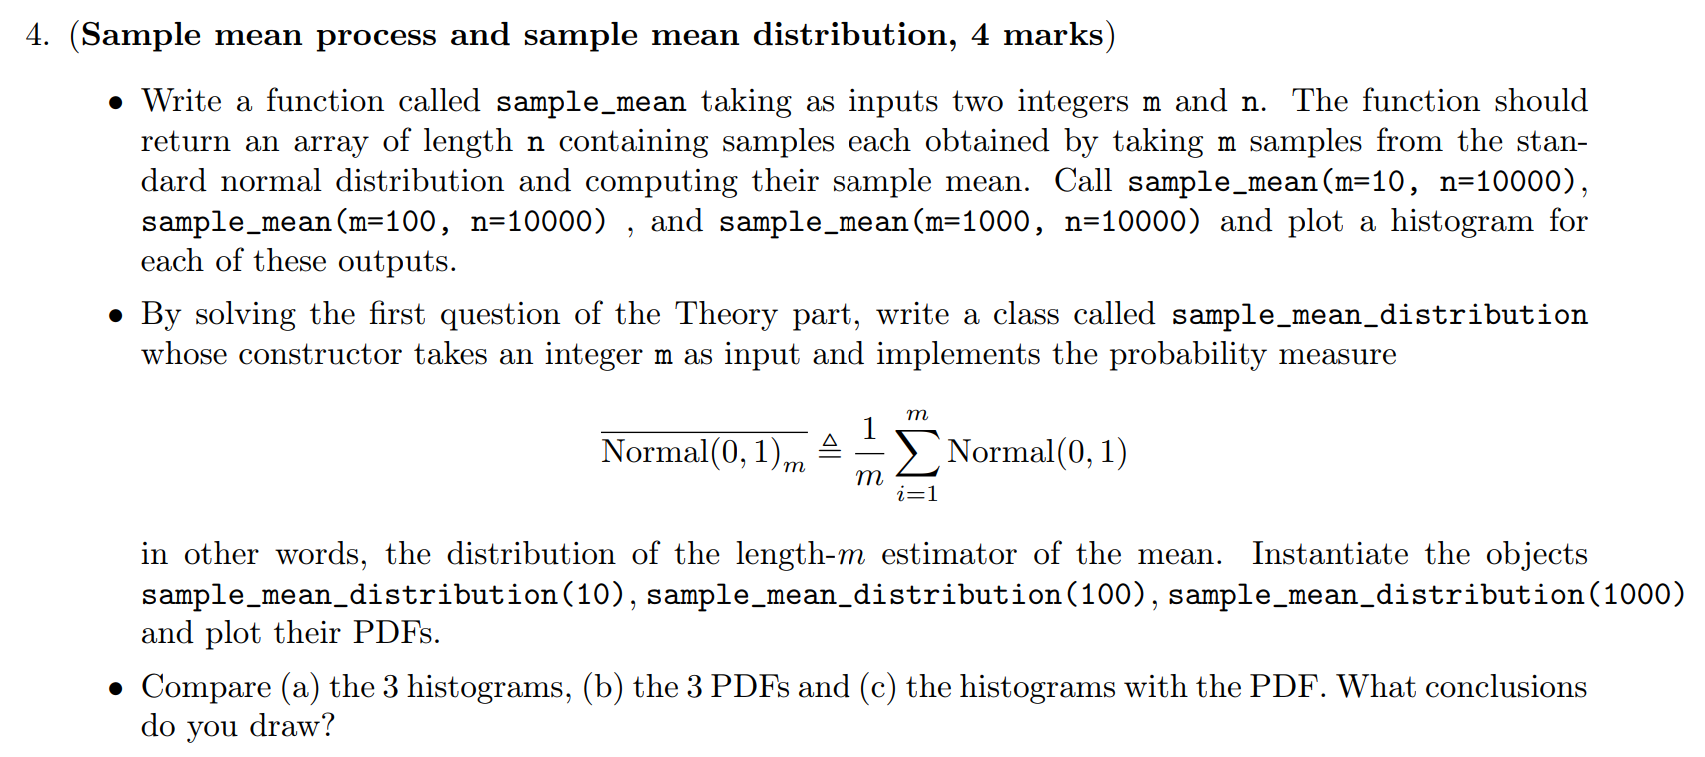

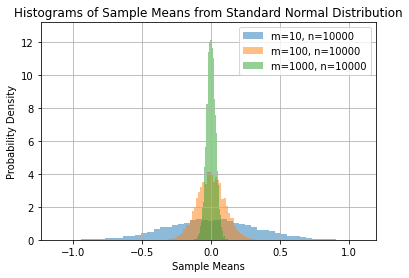

In [43]:
def sample_mean(m, n):
    sample_means = np.mean(np.random.randn(m, n), axis=0)
    return sample_means

# Parameters for different cases
params = [(10, 10000), (100, 10000), (1000, 10000)]

# Plot histograms for each case
for m, n in params:
    sample_means = sample_mean(m, n)
    
    plt.hist(sample_means, bins=50, density=True, alpha=0.5, label=f'm={m}, n={n}')

plt.xlabel('Sample Means')
plt.ylabel('Probability Density')
plt.title('Histograms of Sample Means from Standard Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()
